# PRACTICA M20

Elimine las columnas de tipo categórico de la base de datos y verifique que no existan datos nulos que deban ser eliminados de manera previa al análisis.


Realice un análisis de regresión múltiple para pronosticar la variable “CO2 EMISSIONS” con las variables remanentes. Obtenga los indicadores de bondad de ajuste correspondientes (R cuadrada, Error medio absoluto, etc.). Utilice los coeficientes resultantes y pronostique la primera observación de la base de prueba. ¿Coincide su resultado con aquel obtenido con la instrucción “predict”? Explique.

Repita el ejercicio 3 pero aplicando un modelo de regresión Ridge mediante el valor de Alpha óptimo.


Repita el ejercicio 3 pero aplicando un modelo de regresión Lasso mediante el valor de Alpha óptimo. 


¿Cuál de los 3 modelos de regresión resultó ser el mejor? Explique a detalle.



In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [35]:
# abrimos nuestro archivo con el que trabajaremos

emisiones = pd.read_excel('C:/Users/Isaac/Desktop/IHD/EBAC DT/M20 DS/FuelConsumptionCo2.xlsx')
emisiones.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230


In [36]:
emisiones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 945 non-null    int64  
 1   MAKE                      945 non-null    object 
 2   MODEL                     945 non-null    object 
 3   VEHICLECLASS              945 non-null    object 
 4   ENGINESIZE                945 non-null    float64
 5   CYLINDERS                 945 non-null    int64  
 6   TRANSMISSION              945 non-null    object 
 7   FUELTYPE                  945 non-null    object 
 8   FUELCONSUMPTION_CITY      945 non-null    float64
 9   FUELCONSUMPTION_HWY       945 non-null    float64
 10  FUELCONSUMPTION_COMB      945 non-null    float64
 11  FUELCONSUMPTION_COMB_MPG  945 non-null    int64  
 12  CO2EMISSIONS              945 non-null    int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 96.1+ KB


<Axes: >

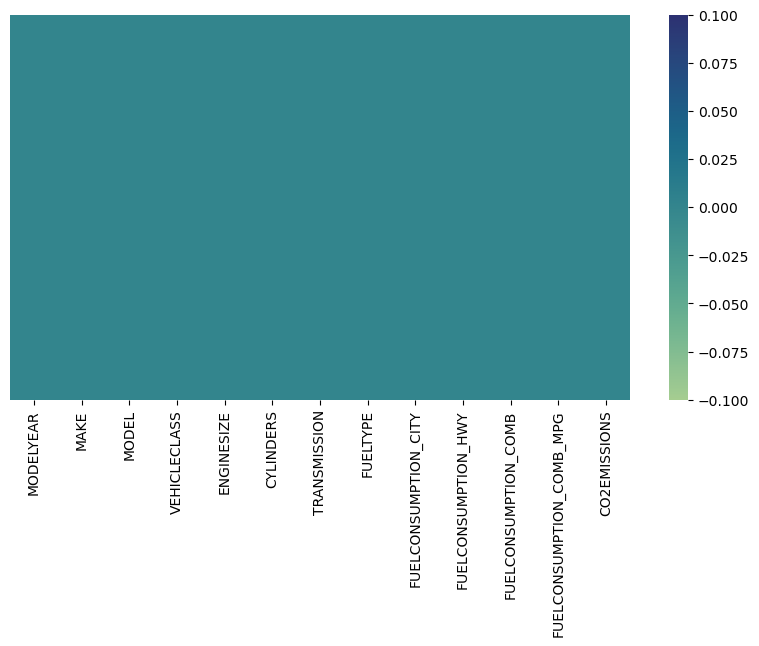

In [37]:
# creamos un grafico de calor para verificar si hay datos faltantes

plt.figure(figsize = (10, 5))
sns.heatmap(emisiones.isnull(), yticklabels = False, cmap = 'crest')

# determinamos que no hay valores faltantes

In [38]:
# eiliminamos variables categoricas

emisiones.drop(['MAKE','MODEL','VEHICLECLASS','TRANSMISSION','FUELTYPE'], axis = 1, inplace = True)
emisiones

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2022,2.4,4,9.9,7.0,8.6,33,200
1,2022,3.5,6,12.6,9.4,11.2,25,263
2,2022,2.0,4,11.0,8.6,9.9,29,232
3,2022,2.0,4,11.3,9.1,10.3,27,242
4,2022,2.0,4,11.2,8.0,9.8,29,230
...,...,...,...,...,...,...,...,...
940,2022,2.0,4,10.7,7.7,9.4,30,219
941,2022,2.0,4,10.5,8.1,9.4,30,219
942,2022,2.0,4,11.0,8.7,9.9,29,232
943,2022,2.0,4,11.5,8.4,10.1,28,236


In [11]:
emisiones.shape

(946, 8)

In [39]:
# definimos los valores para 'X', 'y'

X = emisiones.drop('CO2EMISSIONS', axis = 1)
y = emisiones['CO2EMISSIONS']

In [40]:
X

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG
0,2022,2.4,4,9.9,7.0,8.6,33
1,2022,3.5,6,12.6,9.4,11.2,25
2,2022,2.0,4,11.0,8.6,9.9,29
3,2022,2.0,4,11.3,9.1,10.3,27
4,2022,2.0,4,11.2,8.0,9.8,29
...,...,...,...,...,...,...,...
940,2022,2.0,4,10.7,7.7,9.4,30
941,2022,2.0,4,10.5,8.1,9.4,30
942,2022,2.0,4,11.0,8.7,9.9,29
943,2022,2.0,4,11.5,8.4,10.1,28


In [41]:
y

0      200
1      263
2      232
3      242
4      230
      ... 
940    219
941    219
942    232
943    236
944    252
Name: CO2EMISSIONS, Length: 945, dtype: int64

In [50]:
# Dividimos en grupos de entrenamiento(training) y prueb(test)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)

CONSTRUCCION DE MODELO DE RESGRESION LINEAL MULTIPLE

In [51]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

In [52]:
# entrenamos el modelo

linreg.fit(X_train, y_train)

LinearRegression()

COEFEICIENTES DE REGRESION

In [54]:
print('Intercepto: ', linreg.intercept_)
print('Coeficientes: ', linreg.coef_)

Intercepto:  124.05613100622463
Coeficientes:  [ 0.         -0.01515148  6.43036425 -1.32628678  0.52702525 14.53834062
 -1.88292508]


In [55]:
# realizamos predicciones (probamos modelo)

linregpred = linreg.predict(X_test)
linregpred

array([318.82062694, 322.84703822, 345.23551728, 174.78239603,
       196.73994807, 250.37345085, 240.2772048 , 332.29424162,
       327.80185548, 173.64652185, 275.75871276, 227.67606101,
       323.15858211, 264.7147751 , 175.92922152, 267.50620255,
       162.5548175 , 220.68619289, 337.80918664, 326.56057625,
       322.84703822, 339.48137878, 259.20584163, 220.68619289,
       339.76297512, 201.8255166 , 364.62108712, 334.53095579,
       286.6535063 , 137.95706661, 179.28808399, 175.92922152,
       238.60801519, 291.97541448, 312.36078823, 291.32632034,
       330.50151422, 317.77510602, 327.80185548, 218.69601311,
       302.19635808, 294.44143376, 228.58586706, 182.33789374,
       170.20435766, 247.91950372, 193.35806215, 343.30481828,
       152.91430008, 184.32703834, 291.68467823, 239.45777535,
       170.44542168, 262.19926692, 112.39018005, 312.507081  ,
       343.13766885, 335.91261837, 307.08026329, 385.77737538,
       198.41216797, 150.50258803, 186.61208853, 304.78

AJUSTAMOS EL MODELO CON METRICAS

In [57]:
from sklearn.metrics import r2_score
from sklearn import metrics

In [60]:
# probamos las metricas 

print('Valor de R2: ', r2_score(y_test, linregpred))
print('Error Absoluto Medio: ', metrics.mean_absolute_error(y_test, linregpred))
print('Error Cuadrartico Medio: ', metrics.mean_squared_error(y_test, linregpred))
print('Raiz del Error Caudratico Medio: ', np.sqrt(metrics.mean_squared_error(y_test, linregpred)))

Valor de R2:  0.9775327964689398
Error Absoluto Medio:  6.4183220979861755
Error Cuadrartico Medio:  85.97881014782169
Raiz del Error Caudratico Medio:  9.272475944849988


REGRESION RIDGE

In [61]:
from sklearn.linear_model import Ridge

In [68]:
# probamos con un valor de alpha = 1

ridgereg = Ridge(alpha = 0.1)

# entrenamos el modelo

ridgereg.fit(X_train, y_train)


Ridge(alpha=0.1)

In [69]:

# realizamos predicciones

ridgeregpred = ridgereg.predict(X_test)

In [70]:
# probamos con las metricas de ajuste

print('Valor de R2: ', r2_score(y_test, ridgeregpred))
print('Error Absoluto Medio: ', metrics.mean_absolute_error(y_test, ridgeregpred))
print('Error Cuadrartico Medio: ', metrics.mean_squared_error(y_test, ridgeregpred))
print('Raiz del Error Caudratico Medio: ', np.sqrt(metrics.mean_squared_error(y_test, ridgeregpred)))

Valor de R2:  0.9775405388157286
Error Absoluto Medio:  6.415135896250665
Error Cuadrartico Medio:  85.94918128173981
Raiz del Error Caudratico Medio:  9.27087812894441


COEFICIENTES DEL MODELO RIDGE

In [64]:
print('Intercepto: ', ridgereg.intercept_)
print('Coeficientes: ', ridgereg.coef_)

Intercepto:  123.99617710866374
Coeficientes:  [ 0.         -0.017015    6.42593926 -0.50568931  1.19661489 13.05363848
 -1.88187263]


In [71]:
# buscamos valor optimo de alpha

alpha_range = 10. ** np.arange(-2, 3)
alpha_range

array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])

In [72]:
# utilizamos CV para encontrar la combinacion del valor optimo

from sklearn.linear_model import RidgeCV

In [73]:
ridgeregcv = RidgeCV(alphas = alpha_range)

In [74]:
# entrenamos el modelo

ridgeregcv.fit(X_train, y_train)
ridgeregcv.alpha_

100.0

In [75]:
# realizamos la prediccion utilizando el mejor valor de alpha

ridgeregcvpred = ridgeregcv.predict(X_test)

In [76]:
# probamos con las metricas de ajuste

print('Valor de R2: ', r2_score(y_test, ridgeregcvpred))
print('Error Absoluto Medio: ', metrics.mean_absolute_error(y_test, ridgeregcvpred))
print('Error Cuadrartico Medio: ', metrics.mean_squared_error(y_test, ridgeregcvpred))
print('Raiz del Error Caudratico Medio: ', np.sqrt(metrics.mean_squared_error(y_test, ridgeregcvpred)))

Valor de R2:  0.9779646398338884
Error Absoluto Medio:  6.348640227898685
Error Cuadrartico Medio:  84.32620667017098
Raiz del Error Caudratico Medio:  9.182930178879232


COEFICIENTES DE REGRESION DEL MODELO RIDGE USANDO CV

In [77]:
print('Intercepto: ', ridgeregcv.intercept_)
print('Coeficientes: ', ridgeregcv.coef_)

Intercepto:  129.98702013615804
Coeficientes:  [ 0.          1.15258677  5.30842335  4.44225152  4.49815493  4.55653156
 -1.95117901]


# REGRESIÓN LASSO

In [78]:
# prueba con valor de alpha = 0.001

from sklearn.linear_model import Lasso

In [79]:
lassoreg = Lasso(alpha = 0.001)

In [80]:
# entrenamos el modelo

lassoreg.fit(X_train, y_train)

Lasso(alpha=0.001)

COEFICIENTES DE REGRESION DEL MODELO LASSO

In [81]:
print('Intercepto: ', lassoreg.intercept_)
print('Coeficientes: ', lassoreg.coef_)

Intercepto:  123.13486003787818
Coeficientes:  [ 0.         -0.05568687  6.39362175  7.1821322   7.48383257 -0.85056791
 -1.86749083]


In [82]:
# prueba con alpha = 0.01

lassoreg = Lasso(alpha = 0.01)

In [83]:
# entrenamos el modelo

lassoreg.fit(X_train, y_train)

Lasso(alpha=0.01)

In [84]:
# imprimimos coeficientes

print('Intercepto: ', lassoreg.intercept_)
print('Coeficientes: ', lassoreg.coef_)

Intercepto:  123.34866942884304
Coeficientes:  [ 0.         -0.          6.36561443  6.29526617  6.74930805  0.75481726
 -1.87010303]


In [85]:
# realizamos las predicciones

lassoregpred = lassoreg.predict(X_test)

In [86]:
print('Valor de R2: ', r2_score(y_test, lassoregpred))
print('Error Absoluto Medio: ', metrics.mean_absolute_error(y_test, lassoregpred))
print('Error Cuadrartico Medio: ', metrics.mean_squared_error(y_test, lassoregpred))
print('Raiz del Error Caudratico Medio: ', np.sqrt(metrics.mean_squared_error(y_test, lassoregpred)))

Valor de R2:  0.977565671226078
Error Absoluto Medio:  6.4022959826076935
Error Cuadrartico Medio:  85.85300310206533
Raiz del Error Caudratico Medio:  9.265689564304717


SELECCION DEL VALOR OPTIMO PARA EL MODELO LASSO

In [87]:
from sklearn.linear_model import LassoCV

In [88]:
lassoregcv = LassoCV(n_alphas = 100, random_state = 1)

In [89]:
# entrenamos el modelo

lassoregcv.fit(X_train, y_train)

LassoCV(random_state=1)

In [90]:
print('Alpha Optimo: ', lassoregcv.alpha_)

Alpha Optimo:  0.45442206714715


COEFICIENTES DE REGRESION DE LASSOCV

In [91]:
print('Intercepto: ', lassoregcv.intercept_)
print('Coeficientes: ', lassoregcv.coef_)

Intercepto:  126.10535289477207
Coeficientes:  [ 0.          0.          6.14099602  5.4462973   5.62023828  2.61988286
 -1.90585504]


In [92]:
# prediccion de lasso con el valor optimo

lassoregcvpred = lassoregcv.predict(X_test)

In [93]:
print('Valor de R2', r2_score(y_test, lassoregcvpred))
print('Error Absoluto Medio', metrics.mean_absolute_error(y_test, lassoregcvpred))
print('Error Cuadratico Medio', metrics.mean_squared_error(y_test, lassoregcvpred))
print('Raiz del Error Caudratico Medio', np.sqrt(metrics.mean_squared_error(y_test, lassoregcvpred)))

Valor de R2 0.9775539332111336
Error Absoluto Medio 6.405732289229923
Error Cuadratico Medio 85.89792282503036
Raiz del Error Caudratico Medio 9.268113228971167


RESULTADOS

In [95]:
print('Regresion Lienal Multiple: %f' % r2_score(y_test, linregpred))
print('Regresion Ridge: %f' % r2_score(y_test, ridgeregcvpred))
print('Regresion Lasso: %f' %  r2_score(y_test, lassoregcvpred))

Regresion Lienal Multiple: 0.977533
Regresion Ridge: 0.977965
Regresion Lasso: 0.977554


CONCLUSIÓN.

En este caso los 3 modelos dieron excelentes resultados.

El modelo que mas destaco fue la Regresion Lasso obteniendo un valor de 0.9779 de los 3 modelos es el mas optimo ya que se acerca al valor de 1.